In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
layers = 4
neurons = [32, 32, 16, 1]

In [6]:
import time

In [7]:
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 200,    # len(X_train)
                "h_0": 1,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [8]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

Epoch 1. Training MSE: 1.109, Test MSE: 1.098.
Epoch 2. Training MSE: 0.639, Test MSE: 0.668.
Epoch 3. Training MSE: 0.549, Test MSE: 0.592.
Epoch 4. Training MSE: 0.519, Test MSE: 0.56.
Epoch 5. Training MSE: 0.507, Test MSE: 0.544.
Epoch 6. Training MSE: 0.502, Test MSE: 0.534.
Epoch 7. Training MSE: 0.499, Test MSE: 0.528.
Epoch 8. Training MSE: 0.496, Test MSE: 0.524.
Epoch 9. Training MSE: 0.495, Test MSE: 0.522.
Epoch 10. Training MSE: 0.494, Test MSE: 0.52.
Epoch 11. Training MSE: 0.493, Test MSE: 0.519.
Epoch 12. Training MSE: 0.492, Test MSE: 0.518.
Epoch 13. Training MSE: 0.492, Test MSE: 0.517.
Epoch 14. Training MSE: 0.491, Test MSE: 0.517.
Epoch 15. Training MSE: 0.491, Test MSE: 0.516.
Epoch 16. Training MSE: 0.49, Test MSE: 0.516.
Epoch 17. Training MSE: 0.49, Test MSE: 0.516.
Epoch 18. Training MSE: 0.49, Test MSE: 0.515.
Epoch 19. Training MSE: 0.49, Test MSE: 0.515.
Epoch 20. Training MSE: 0.489, Test MSE: 0.515.
Calculation time for 100 particles: 13.803579676151276 

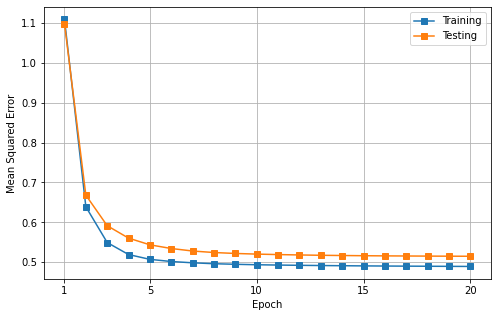

Epoch 1. Training MSE: 1.024, Test MSE: 1.023.
Epoch 2. Training MSE: 0.741, Test MSE: 0.74.
Epoch 3. Training MSE: 0.622, Test MSE: 0.623.
Epoch 4. Training MSE: 0.564, Test MSE: 0.574.
Epoch 5. Training MSE: 0.532, Test MSE: 0.549.
Epoch 6. Training MSE: 0.528, Test MSE: 0.558.
Epoch 7. Training MSE: 0.509, Test MSE: 0.543.
Epoch 8. Training MSE: 0.495, Test MSE: 0.531.
Epoch 9. Training MSE: 0.485, Test MSE: 0.525.
Epoch 10. Training MSE: 0.477, Test MSE: 0.515.
Epoch 11. Training MSE: 0.473, Test MSE: 0.51.
Epoch 12. Training MSE: 0.469, Test MSE: 0.507.
Epoch 13. Training MSE: 0.466, Test MSE: 0.505.
Epoch 14. Training MSE: 0.464, Test MSE: 0.503.
Epoch 15. Training MSE: 0.461, Test MSE: 0.501.
Epoch 16. Training MSE: 0.459, Test MSE: 0.5.
Epoch 17. Training MSE: 0.458, Test MSE: 0.499.
Epoch 18. Training MSE: 0.456, Test MSE: 0.498.
Epoch 19. Training MSE: 0.455, Test MSE: 0.498.
Epoch 20. Training MSE: 0.454, Test MSE: 0.497.
Calculation time for 200 particles: 28.10063988367716

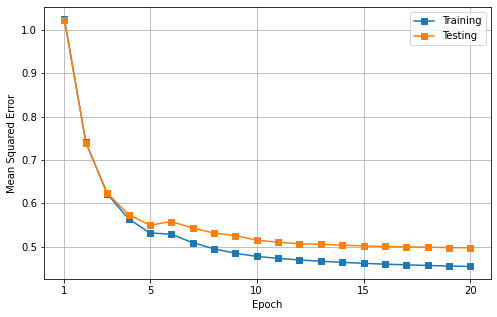

Epoch 1. Training MSE: 1.133, Test MSE: 1.132.
Epoch 2. Training MSE: 0.789, Test MSE: 0.787.
Epoch 3. Training MSE: 0.69, Test MSE: 0.686.
Epoch 4. Training MSE: 0.603, Test MSE: 0.604.
Epoch 5. Training MSE: 0.58, Test MSE: 0.588.
Epoch 6. Training MSE: 0.576, Test MSE: 0.591.
Epoch 7. Training MSE: 0.559, Test MSE: 0.572.
Epoch 8. Training MSE: 0.547, Test MSE: 0.562.
Epoch 9. Training MSE: 0.53, Test MSE: 0.55.
Epoch 10. Training MSE: 0.509, Test MSE: 0.531.
Epoch 11. Training MSE: 0.494, Test MSE: 0.518.
Epoch 12. Training MSE: 0.481, Test MSE: 0.507.
Epoch 13. Training MSE: 0.473, Test MSE: 0.502.
Epoch 14. Training MSE: 0.467, Test MSE: 0.5.
Epoch 15. Training MSE: 0.462, Test MSE: 0.5.
Epoch 16. Training MSE: 0.458, Test MSE: 0.499.
Epoch 17. Training MSE: 0.455, Test MSE: 0.499.
Epoch 18. Training MSE: 0.452, Test MSE: 0.498.
Epoch 19. Training MSE: 0.449, Test MSE: 0.496.
Epoch 20. Training MSE: 0.447, Test MSE: 0.495.
Calculation time for 300 particles: 42.65873690843582 min

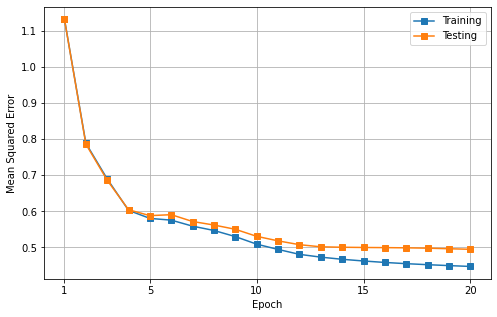

Epoch 1. Training MSE: 1.223, Test MSE: 1.223.
Epoch 2. Training MSE: 0.801, Test MSE: 0.802.
Epoch 3. Training MSE: 0.739, Test MSE: 0.74.
Epoch 4. Training MSE: 0.705, Test MSE: 0.708.
Epoch 5. Training MSE: 0.658, Test MSE: 0.666.
Epoch 6. Training MSE: 0.606, Test MSE: 0.619.
Epoch 7. Training MSE: 0.588, Test MSE: 0.605.
Epoch 8. Training MSE: 0.602, Test MSE: 0.621.
Epoch 9. Training MSE: 0.591, Test MSE: 0.612.
Epoch 10. Training MSE: 0.568, Test MSE: 0.592.
Epoch 11. Training MSE: 0.554, Test MSE: 0.581.
Epoch 12. Training MSE: 0.545, Test MSE: 0.572.
Epoch 13. Training MSE: 0.538, Test MSE: 0.567.
Epoch 14. Training MSE: 0.517, Test MSE: 0.542.
Epoch 15. Training MSE: 0.499, Test MSE: 0.523.
Epoch 16. Training MSE: 0.483, Test MSE: 0.509.
Epoch 17. Training MSE: 0.475, Test MSE: 0.501.
Epoch 18. Training MSE: 0.467, Test MSE: 0.499.
Epoch 19. Training MSE: 0.46, Test MSE: 0.498.
Epoch 20. Training MSE: 0.456, Test MSE: 0.497.
Calculation time for 400 particles: 58.177236493428

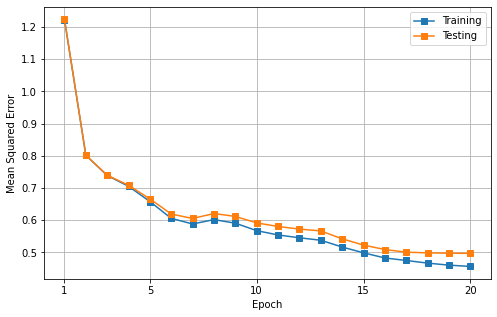

Epoch 1. Training MSE: 1.292, Test MSE: 1.292.
Epoch 2. Training MSE: 0.776, Test MSE: 0.777.
Epoch 3. Training MSE: 0.69, Test MSE: 0.695.
Epoch 4. Training MSE: 0.638, Test MSE: 0.65.
Epoch 5. Training MSE: 0.596, Test MSE: 0.617.
Epoch 6. Training MSE: 0.591, Test MSE: 0.62.
Epoch 7. Training MSE: 0.615, Test MSE: 0.646.
Epoch 8. Training MSE: 0.626, Test MSE: 0.659.
Epoch 9. Training MSE: 0.614, Test MSE: 0.651.
Epoch 10. Training MSE: 0.606, Test MSE: 0.65.
Epoch 11. Training MSE: 0.596, Test MSE: 0.641.
Epoch 12. Training MSE: 0.56, Test MSE: 0.602.
Epoch 13. Training MSE: 0.531, Test MSE: 0.57.
Epoch 14. Training MSE: 0.518, Test MSE: 0.551.
Epoch 15. Training MSE: 0.501, Test MSE: 0.535.
Epoch 16. Training MSE: 0.477, Test MSE: 0.511.
Epoch 17. Training MSE: 0.467, Test MSE: 0.499.
Epoch 18. Training MSE: 0.457, Test MSE: 0.49.
Epoch 19. Training MSE: 0.45, Test MSE: 0.482.
Epoch 20. Training MSE: 0.444, Test MSE: 0.478.
Calculation time for 500 particles: 73.69694671630859 min

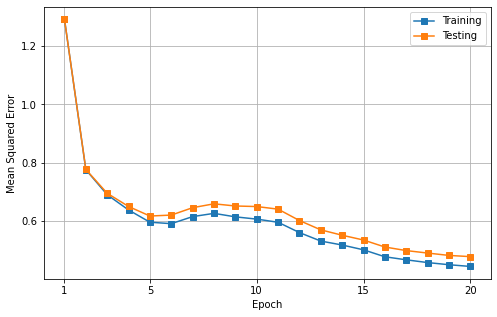

Epoch 1. Training MSE: 1.39, Test MSE: 1.39.
Epoch 2. Training MSE: 0.836, Test MSE: 0.836.
Epoch 3. Training MSE: 0.755, Test MSE: 0.755.
Epoch 4. Training MSE: 0.707, Test MSE: 0.708.
Epoch 5. Training MSE: 0.661, Test MSE: 0.665.
Epoch 6. Training MSE: 0.624, Test MSE: 0.632.
Epoch 7. Training MSE: 0.605, Test MSE: 0.619.
Epoch 8. Training MSE: 0.601, Test MSE: 0.62.
Epoch 9. Training MSE: 0.604, Test MSE: 0.629.
Epoch 10. Training MSE: 0.615, Test MSE: 0.64.
Epoch 11. Training MSE: 0.623, Test MSE: 0.645.
Epoch 12. Training MSE: 0.623, Test MSE: 0.641.
Epoch 13. Training MSE: 0.615, Test MSE: 0.627.
Epoch 14. Training MSE: 0.581, Test MSE: 0.589.
Epoch 15. Training MSE: 0.559, Test MSE: 0.568.
Epoch 16. Training MSE: 0.536, Test MSE: 0.554.
Epoch 17. Training MSE: 0.519, Test MSE: 0.546.
Epoch 18. Training MSE: 0.503, Test MSE: 0.54.
Epoch 19. Training MSE: 0.49, Test MSE: 0.529.
Epoch 20. Training MSE: 0.482, Test MSE: 0.522.
Calculation time for 600 particles: 90.58266912301382 m

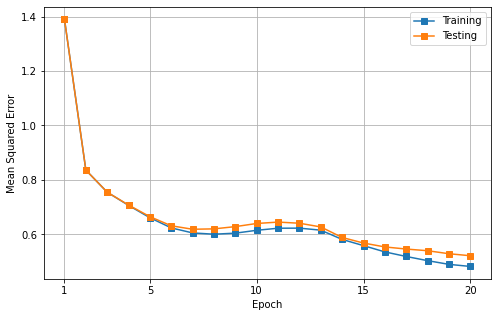

Epoch 1. Training MSE: 1.466, Test MSE: 1.467.
Epoch 2. Training MSE: 0.856, Test MSE: 0.857.
Epoch 3. Training MSE: 0.773, Test MSE: 0.775.
Epoch 4. Training MSE: 0.737, Test MSE: 0.739.
Epoch 5. Training MSE: 0.714, Test MSE: 0.719.
Epoch 6. Training MSE: 0.694, Test MSE: 0.701.
Epoch 7. Training MSE: 0.677, Test MSE: 0.687.
Epoch 8. Training MSE: 0.66, Test MSE: 0.673.
Epoch 9. Training MSE: 0.642, Test MSE: 0.658.
Epoch 10. Training MSE: 0.622, Test MSE: 0.642.
Epoch 11. Training MSE: 0.608, Test MSE: 0.63.
Epoch 12. Training MSE: 0.6, Test MSE: 0.624.
Epoch 13. Training MSE: 0.597, Test MSE: 0.621.
Epoch 14. Training MSE: 0.606, Test MSE: 0.629.
Epoch 15. Training MSE: 0.623, Test MSE: 0.649.
Epoch 16. Training MSE: 0.627, Test MSE: 0.66.
Epoch 17. Training MSE: 0.627, Test MSE: 0.667.
Epoch 18. Training MSE: 0.621, Test MSE: 0.662.
Epoch 19. Training MSE: 0.607, Test MSE: 0.649.
Epoch 20. Training MSE: 0.585, Test MSE: 0.628.
Calculation time for 700 particles: 106.74575274387995

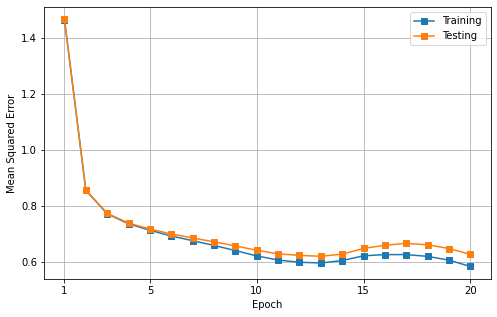

Epoch 1. Training MSE: 1.448, Test MSE: 1.449.
Epoch 2. Training MSE: 0.851, Test MSE: 0.853.
Epoch 3. Training MSE: 0.784, Test MSE: 0.787.
Epoch 4. Training MSE: 0.764, Test MSE: 0.767.
Epoch 5. Training MSE: 0.75, Test MSE: 0.754.
Epoch 6. Training MSE: 0.736, Test MSE: 0.741.
Epoch 7. Training MSE: 0.721, Test MSE: 0.727.
Epoch 8. Training MSE: 0.701, Test MSE: 0.708.
Epoch 9. Training MSE: 0.677, Test MSE: 0.687.
Epoch 10. Training MSE: 0.65, Test MSE: 0.662.
Epoch 11. Training MSE: 0.622, Test MSE: 0.635.
Epoch 12. Training MSE: 0.595, Test MSE: 0.609.
Epoch 13. Training MSE: 0.581, Test MSE: 0.598.
Epoch 14. Training MSE: 0.593, Test MSE: 0.614.
Epoch 15. Training MSE: 0.62, Test MSE: 0.648.
Epoch 16. Training MSE: 0.637, Test MSE: 0.672.
Epoch 17. Training MSE: 0.616, Test MSE: 0.658.
Epoch 18. Training MSE: 0.612, Test MSE: 0.654.
Epoch 19. Training MSE: 0.635, Test MSE: 0.674.
Epoch 20. Training MSE: 0.646, Test MSE: 0.687.
Calculation time for 800 particles: 124.941282355785

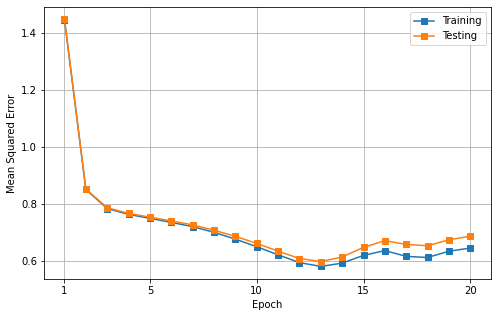

Epoch 1. Training MSE: 1.661, Test MSE: 1.663.
Epoch 2. Training MSE: 0.933, Test MSE: 0.934.
Epoch 3. Training MSE: 0.835, Test MSE: 0.836.
Epoch 4. Training MSE: 0.798, Test MSE: 0.799.
Epoch 5. Training MSE: 0.783, Test MSE: 0.785.
Epoch 6. Training MSE: 0.774, Test MSE: 0.777.
Epoch 7. Training MSE: 0.768, Test MSE: 0.772.
Epoch 8. Training MSE: 0.761, Test MSE: 0.766.
Epoch 9. Training MSE: 0.75, Test MSE: 0.757.
Epoch 10. Training MSE: 0.74, Test MSE: 0.748.
Epoch 11. Training MSE: 0.726, Test MSE: 0.736.
Epoch 12. Training MSE: 0.699, Test MSE: 0.711.
Epoch 13. Training MSE: 0.668, Test MSE: 0.684.
Epoch 14. Training MSE: 0.644, Test MSE: 0.663.
Epoch 15. Training MSE: 0.625, Test MSE: 0.647.
Epoch 16. Training MSE: 0.611, Test MSE: 0.636.
Epoch 17. Training MSE: 0.601, Test MSE: 0.629.
Epoch 18. Training MSE: 0.592, Test MSE: 0.623.
Epoch 19. Training MSE: 0.582, Test MSE: 0.617.
Epoch 20. Training MSE: 0.57, Test MSE: 0.608.
Calculation time for 900 particles: 143.955133231480

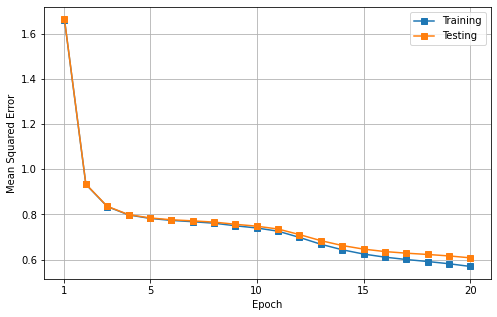

Epoch 1. Training MSE: 1.63, Test MSE: 1.632.
Epoch 2. Training MSE: 0.94, Test MSE: 0.941.
Epoch 3. Training MSE: 0.845, Test MSE: 0.846.
Epoch 4. Training MSE: 0.809, Test MSE: 0.809.
Epoch 5. Training MSE: 0.791, Test MSE: 0.791.
Epoch 6. Training MSE: 0.775, Test MSE: 0.775.
Epoch 7. Training MSE: 0.764, Test MSE: 0.765.
Epoch 8. Training MSE: 0.754, Test MSE: 0.754.
Epoch 9. Training MSE: 0.747, Test MSE: 0.748.


In [ ]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor(X_train,
                                                                           X_test,
                                                                           y_train,
                                                                           y_test,
                                                                           layers,
                                                                           neurons,
                                                                           setting_dict,
                                                                           save_all = True,
                                                                           file_var = "../objects/wine/enkf_wine_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                           file_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                           verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [ ]:
obj_dict = load_objects("../objects/wine/enkf_wine_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [ ]:
final_model = nn_load("../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))